<a href="https://colab.research.google.com/github/DanielaJim07/Simulaci-n-I/blob/main/Montecarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monte Carlo de Acierto y Error

El método de Monte Carlo es una técnica probabilística utilizada para aproximar valores numéricos, como integrales definidas. En este caso, utilizamos el método de dardos para estimar la integral de una función en un intervalo dado.

In [4]:
import random as rd
from matplotlib  import pyplot as plt
import numpy as np
from scipy.integrate import quad

Valor real de la integral: 0.6298233442079734
Estimación de la integral: 0.6256
Error absoluto: 0.004223344207973323


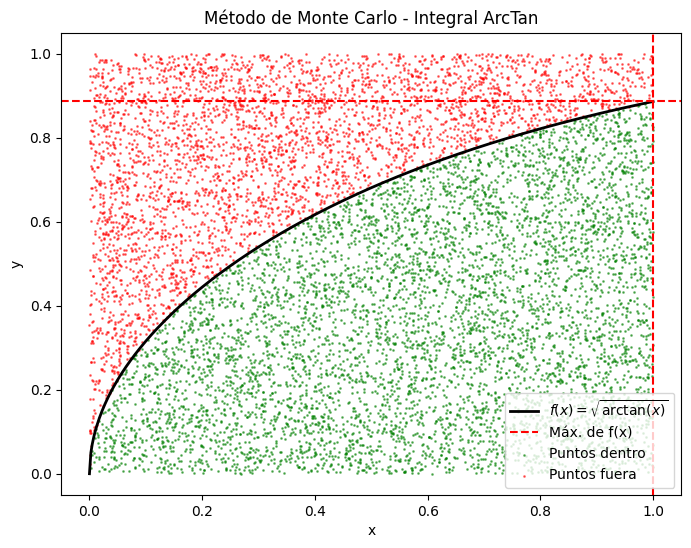

Media de los experimentos: 0.629989
Varianza de los experimentos: 2.3454379000000016e-05
Error absoluto medio: 0.00016565579202665326


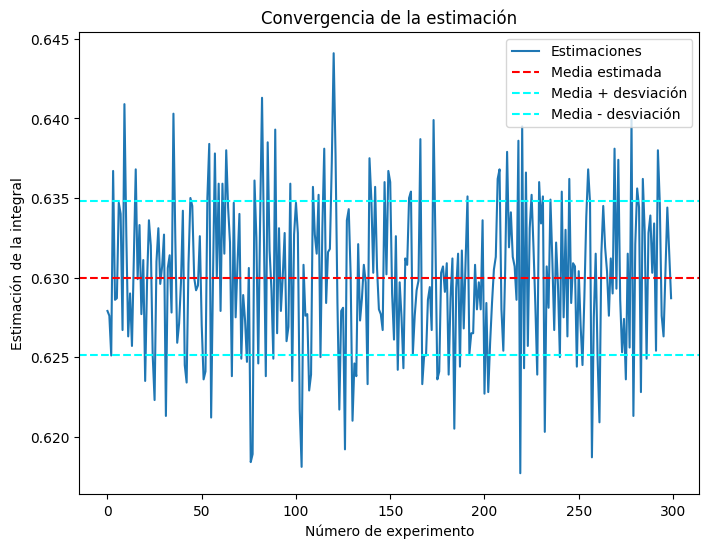

In [6]:


# Definir la función f(x)
def f(x):
    return np.sqrt(np.arctan(x))

# Generar valores de x y f(x) para la gráfica
x = np.linspace(0, 1, 400)
y = f(x)

# Calcular el valor real de la integral usando cuadratura numérica
valor_real, _ = quad(f, 0, 1)
print("Valor real de la integral:", valor_real)

# Función de Monte Carlo con método de dardos
def dardos(n):
    exitos = 0
    puntos_x = []
    puntos_y = []
    puntos_dentro_x = []
    puntos_dentro_y = []
    puntos_fuera_x = []
    puntos_fuera_y = []

    for _ in range(n):
        u1 = rd.random()  # Genera un número aleatorio en [0,1]
        u2 = rd.random()  # Genera un número aleatorio en [0,1]

        puntos_x.append(u1)
        puntos_y.append(u2)

        if u2 <= f(u1):  # Punto dentro de la región bajo la curva
            exitos += 1
            puntos_dentro_x.append(u1)
            puntos_dentro_y.append(u2)
        else:  # Punto fuera de la región
            puntos_fuera_x.append(u1)
            puntos_fuera_y.append(u2)

    prob = exitos / n
    return prob, puntos_dentro_x, puntos_dentro_y, puntos_fuera_x, puntos_fuera_y

# Ejecutar experimento con 10,000 puntos
probabilidad, dentro_x, dentro_y, fuera_x, fuera_y = dardos(10000)
error_absoluto = abs(valor_real - probabilidad)

print("Estimación de la integral:", probabilidad)
print("Error absoluto:", error_absoluto)

# Graficar la función y los puntos generados
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=r"$f(x) = \sqrt{\arctan(x)}$", color="black", linewidth=2)
plt.axhline(f(1), color="red", linestyle="--", label="Máx. de f(x)")
plt.axvline(1, color="red", linestyle="--")

# Graficar puntos
plt.scatter(dentro_x, dentro_y, color="green", s=1, alpha=0.5, label="Puntos dentro")
plt.scatter(fuera_x, fuera_y, color="red", s=1, alpha=0.5, label="Puntos fuera")

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Método de Monte Carlo - Integral ArcTan")
plt.show()

# Función para realizar múltiples experimentos
def experimento(m, n=10000):
    lista = []
    for _ in range(m):
        d, _, _, _, _ = dardos(n)  # Ejecutar con n fijo
        lista.append(d)
    return lista

# Realizar 300 experimentos con n=10000
L = experimento(300, n=10000)

# Calcular media, varianza y error absoluto promedio
media_L = np.mean(L)
varianza_L = np.var(L)
error_absoluto_medio = abs(valor_real - media_L)

print("Media de los experimentos:", media_L)
print("Varianza de los experimentos:", varianza_L)
print("Error absoluto medio:", error_absoluto_medio)

# Graficar la convergencia
plt.figure(figsize=(8, 6))
plt.plot(L, label="Estimaciones")
plt.axhline(y=media_L, color='r', linestyle='--', label="Media estimada")
plt.axhline(y=media_L + np.sqrt(varianza_L), color='cyan', linestyle='--', label="Media + desviación")
plt.axhline(y=media_L - np.sqrt(varianza_L), color='cyan', linestyle='--', label="Media - desviación")
plt.legend()
plt.xlabel("Número de experimento")
plt.ylabel("Estimación de la integral")
plt.title("Convergencia de la estimación")
plt.show()
